In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import model_based_agent as mba 
import worm_env as we 
import fake_worm as fw
import ensemble_mod_env as eme

from improc import *
import utils as ut
import tab_agents as tab
from datetime import datetime 

In [2]:
folds = ['./Data/Det02-02-16-45/',
        './Data/Det03-02-13-16/',
        './Data/Det03-02-14-39/',
        './Data/Det03-02-15-48/',
        './Data/Learned02-02-13-48/',
        './Data/Learned02-02-18-29/',
        './Data/Learned02-02-19-43/',
        './Data/Random02-02-15-10/',
        ]

In [3]:
def load_folder(fold,name,n=15):
    # Loads trajectories into a dict with lists of arrays. 
    trajs = []
    for i in range(n):
        with open(f'{fold}{name}{i}.pkl','rb') as f:
            trajs.append(pickle.load(f))
    
    t_dict = {}
    for k in trajs[0].keys():
        t_dict[k] = [np.array(trajs[i][k]).flatten() for i in range(n)]
        if k=='loc' or k=='obs':
            t_dict[k] = [t_dict[k][i].reshape(-1,2) for i in range(n)]
    return t_dict

In [5]:
dets = []
for d in np.arange(4):
    dets.append(load_folder(folds[d],'det'))
learneds = []
for l in np.arange(3)+4:
    learneds.append(load_folder(folds[l],name='learned'))
rands = load_folder(folds[-1],'random')

In [9]:
n=15
det_rs = [[np.mean(dets[j]['reward'][i]) for i in range(n)] for j in range(4)]
learned_rs = [[np.mean(learneds[j]['reward'][i]) for i in range(n)] for j in range(3)]
rand_rs = [np.mean(rands['reward'][i]) for i in range(n)]

In [10]:
det_rs[0] = np.delete(det_rs[0],[8,9,10]) # Deleted episodes where worm was lost. Data in this set are messy; will recollect

In [14]:
mean_vec = [*[np.mean(det_rs[i]) for i in range(4)],*[np.mean(learned_rs[i]) for i in range(3)],np.mean(rand_rs)]
std_vec = [*[np.std(det_rs[i]) for i in range(4)],*[np.std(learned_rs[i]) for i in range(3)],np.std(rand_rs)]
plot_vec = [-.1,-.05,0,.05,.95,1,1.05,2]

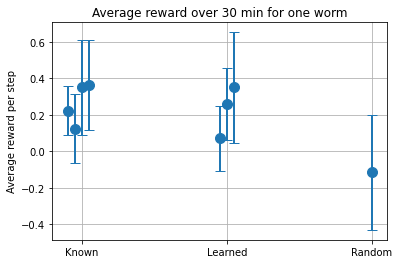

In [15]:
plt.errorbar(plot_vec,mean_vec,yerr=std_vec,marker='o',markersize=10,capsize=5,linewidth=0,elinewidth=2)
plt.grid();
plt.title('Average reward over 30 min for one worm')
plt.xticks([0,1,2],['Known','Learned','Random']);
plt.ylabel('Average reward per step');

# Next for experiments:
#### Control: No light
#### More known and random worms

Online learning: goals are to learn timescale and efficiency. 

Can I learn the timescale from the current 3 hrs of random data?


# Learning timescale

In [24]:
files = ['./Data/HTFix19-01-18-47/',
           './Data/HTFix19-01-20-29/',
           './Data/HTFix19-01-21-18/',
           './Data/HTFix20-01-09-04/',
           './Data/HTFix20-01-09-42/',
           './Data/HTFix20-01-10-41/',
          ]
files = ['../01_13_reals/'+f[2:] for f in files]
t_files = []
for file in files:
    if file=='../01_13_reals/Data/HTFix19-01-21-18/':
        for i in range(3):
            t_files.append(f'{file}collect{i}.pkl')
    else:
        for i in range(6):
            t_files.append(f'{file}collect{i}.pkl')

In [26]:
r=17
dh = mba.DataHandler()
dh.params = {
            'reward_ahead': r,
            'timestep_gap': 1,
            'prev_act_window': 3,
            'jump_limit': 100,
        }
dh.add_dict_to_df(t_files,reward_ahead=r)
mset = eme.ModelSet(1,frac=1,lp_frac=None)
mset.make_models(dh,sm_pars={'lambda':.1,'iters':10})

with open(f'model_ra_{r}.pkl','wb') as f:
    pickle.dump(mset,f)

C:\Users\ccli3\Documents\Research\20_09_07_NewPC\RLWorms\01_22_baselines\utils.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['angs'][i] = np.flip(df['angs'][i])


On model 0
